# Graphs of Model Outputs

# Prepare data section

In [49]:
import pandas as pd
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [50]:
from google.colab import drive
drive.mount('/content/gdrive')

path_to_model = "/content/gdrive/My Drive/data/model/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Data

In [51]:
def get_combined_data(model_txt):
  """
  Returns two dataframes for inputed and random data ready to be graphed for the evaluation metrics.
  The columns are 'Metrics', 'k', 'score' and 'Perturb Percentage'.

  model_txt: either 'cnn_evaluation.txt' or 'bst_evaluation.txt'

  Returns: 
  
  df_inputed - A dataframe with all necessary information for inputed data
  df_random - A dataframe with all necessary information for random data
  """
  df_random_list = []
  df_inputed_list = []
  
  path_to_txt_truth = "/content/gdrive/My Drive/data/model/ground_truth/{}".format(model_txt)

  for perturb_num in range(10, 60, 10):
    path_to_txt_random = "/content/gdrive/My Drive/data/model/random_ratings_data_{}/".format(perturb_num)
    path_to_txt_inputed = "/content/gdrive/My Drive/data/model/inputed_ratings_data_{}/".format(perturb_num)

    df_random_holder = pd.read_csv(path_to_txt_random + model_txt, sep=" ", header = None)
    df_inputed_holder = pd.read_csv(path_to_txt_inputed + model_txt, sep=" ", header = None)

    df_random_holder.rename(columns={0: "Metrics", 2: "k", 4: "score"}, inplace=True)
    df_inputed_holder.rename(columns={0: "Metrics", 2: "k", 4: "score"}, inplace=True)

    del df_random_holder[1]
    del df_random_holder[3]
    del df_inputed_holder[1]
    del df_inputed_holder[3]

    # add column of all perturb_num
    df_random_holder['Perturb Percentage'] = [perturb_num] * df_random_holder.shape[0]
    df_inputed_holder['Perturb Percentage'] = [perturb_num] * df_inputed_holder.shape[0]

    df_random_list.append(df_random_holder)
    df_inputed_list.append(df_inputed_holder)

  df_truth = pd.read_csv(path_to_txt_truth, sep=" ", header = None)
  df_truth.rename(columns={0: "Metrics", 2: "k", 4: "score"}, inplace=True)
  del df_truth[1]
  del df_truth[3]
  df_truth['Perturb Percentage'] = [0] * df_inputed_holder.shape[0]


  df_inputed_list.append(df_truth)
  df_random_list.append(df_truth)

  df_inputed = pd.concat(df_inputed_list)
  df_random = pd.concat(df_random_list)

  df_inputed.reset_index(drop=True, inplace=True)
  df_random.reset_index(drop=True, inplace=True)

  return df_inputed, df_random

In [52]:
cnn_text = 'cnn_evaluation.txt'
bst_text = 'bst_evaluation.txt'

df_inputed_cnn, df_random_cnn = get_combined_data(cnn_text)
df_inputed_bst, df_random_bst = get_combined_data(bst_text)

# CNN Graphs

## Inputed Data

[Text(0.5, 1.0, 'CNN Imputation Perturbation Precision@k Per User')]

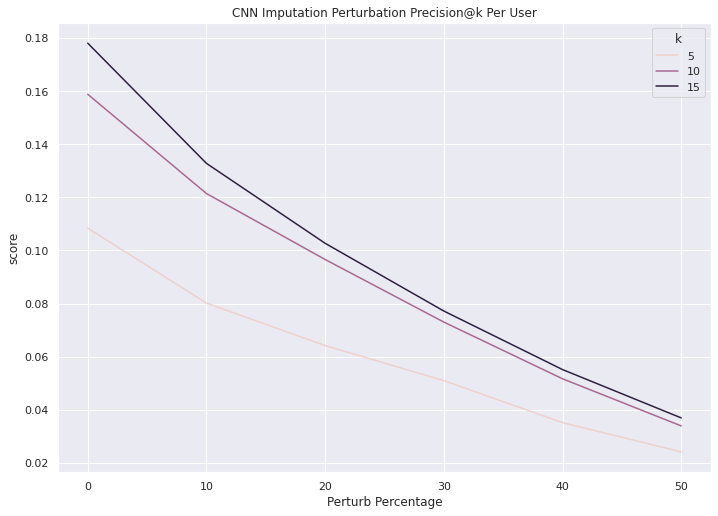

In [53]:
sns.lineplot(data=df_inputed_cnn[df_inputed_cnn['Metrics'] == 'Precision'], x='Perturb Percentage', y="score", hue="k").set(title='CNN Imputation Perturbation Precision@k Per User')

[Text(0.5, 1.0, 'CNN Imputation Perturbation Recall@k Per User')]

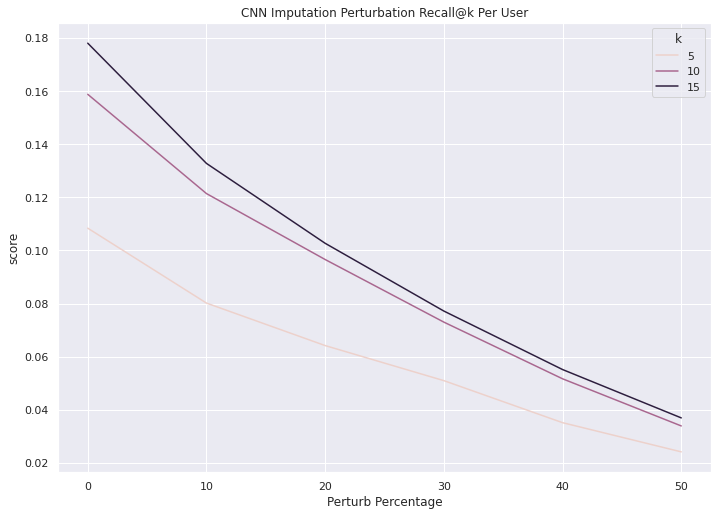

In [54]:
sns.lineplot(data=df_inputed_cnn[df_inputed_cnn['Metrics'] == 'Recall'], x='Perturb Percentage', y="score", hue="k").set(title='CNN Imputation Perturbation Recall@k Per User')

[Text(0.5, 1.0, 'CNN Imputation Perturbation NDCG@k Per User')]

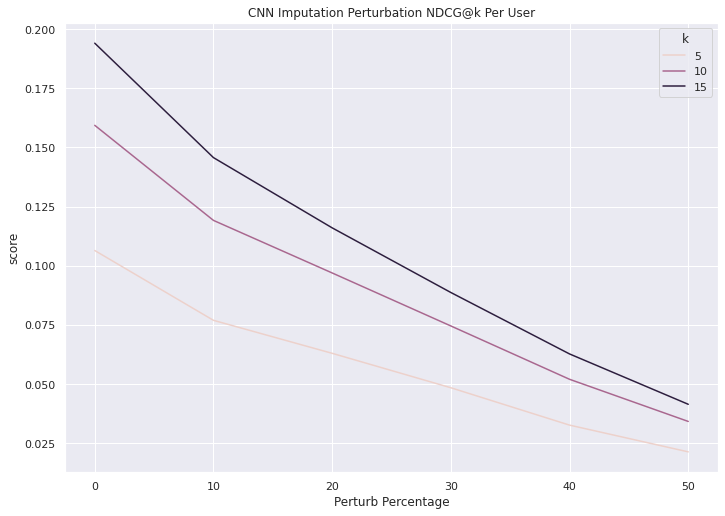

In [55]:
sns.lineplot(data=df_inputed_cnn[df_inputed_cnn['Metrics'] == 'NDCG'], x='Perturb Percentage', y="score", hue="k").set(title='CNN Imputation Perturbation NDCG@k Per User')

### Random Data

[Text(0.5, 1.0, 'CNN Order Perturbation Precision@k Per User')]

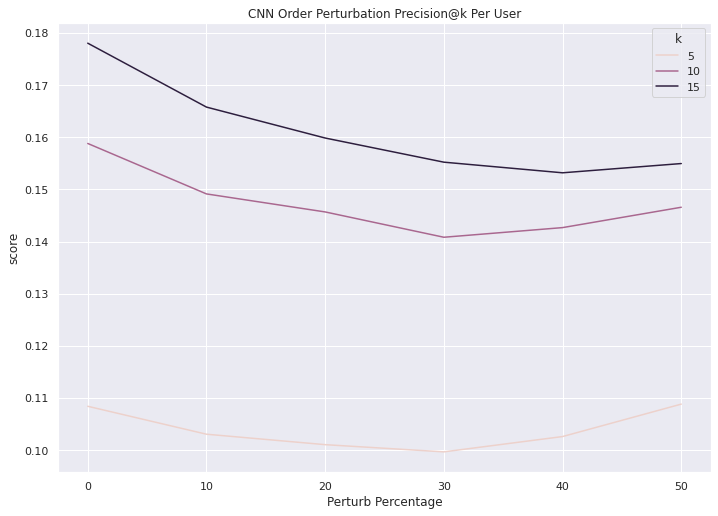

In [56]:
sns.lineplot(data=df_random_cnn[df_random_cnn['Metrics'] == 'Precision'], x='Perturb Percentage', y="score", hue="k").set(title='CNN Order Perturbation Precision@k Per User')

[Text(0.5, 1.0, 'CNN Order Perturbation Recall@k Per User')]

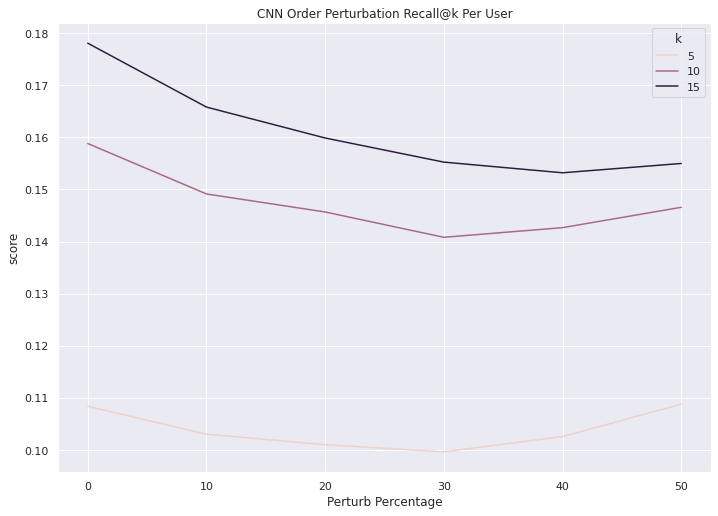

In [57]:
sns.lineplot(data=df_random_cnn[df_random_cnn['Metrics'] == 'Recall'], x='Perturb Percentage', y="score", hue="k").set(title='CNN Order Perturbation Recall@k Per User')

[Text(0.5, 1.0, 'CNN Order Perturbation NDCG@k Per User')]

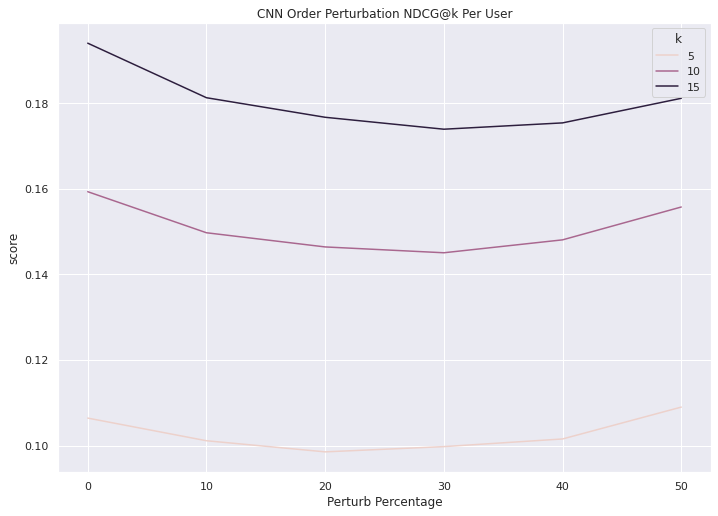

In [58]:
sns.lineplot(data=df_random_cnn[df_random_cnn['Metrics'] == 'NDCG'], x='Perturb Percentage', y="score", hue="k").set(title='CNN Order Perturbation NDCG@k Per User')

# BST Graphs

## Inputed Data

[Text(0.5, 1.0, 'BST Imputation Perturbation Precision@k Per User')]

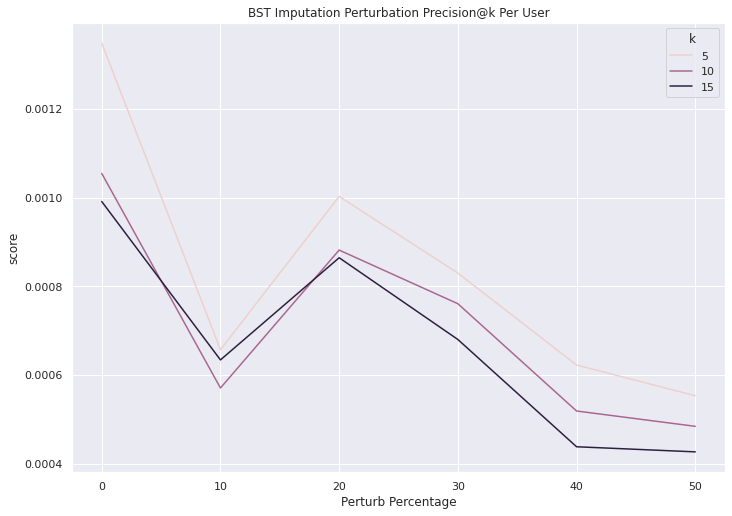

In [59]:
sns.lineplot(data=df_inputed_bst[df_inputed_bst['Metrics'] == 'Precision'], x='Perturb Percentage', y="score", hue="k").set(title='BST Imputation Perturbation Precision@k Per User')

[Text(0.5, 1.0, 'BST Imputation Perturbation Recall@k Per User')]

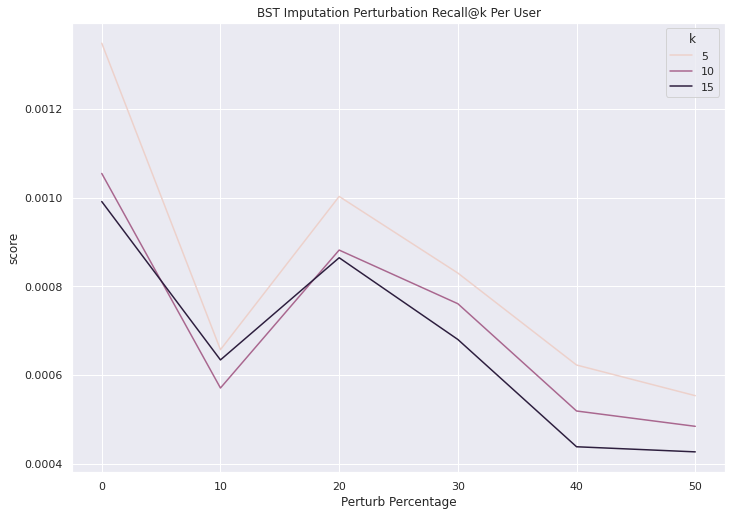

In [60]:
sns.lineplot(data=df_inputed_bst[df_inputed_bst['Metrics'] == 'Recall'], x='Perturb Percentage', y="score", hue="k").set(title='BST Imputation Perturbation Recall@k Per User')

[Text(0.5, 1.0, 'BST Imputation Perturbation NDCG@k Per User')]

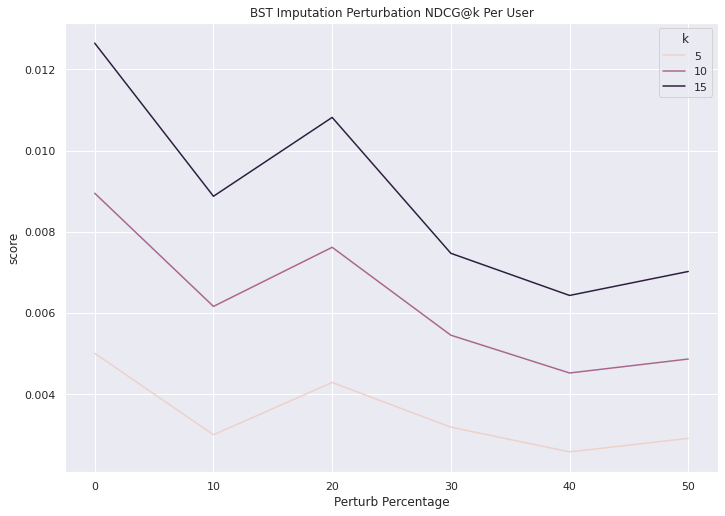

In [61]:
sns.lineplot(data=df_inputed_bst[df_inputed_bst['Metrics'] == 'NDCG'], x='Perturb Percentage', y="score", hue="k").set(title='BST Imputation Perturbation NDCG@k Per User')

### Random Data

[Text(0.5, 1.0, 'BST Order Perturbation Precision@k Per User')]

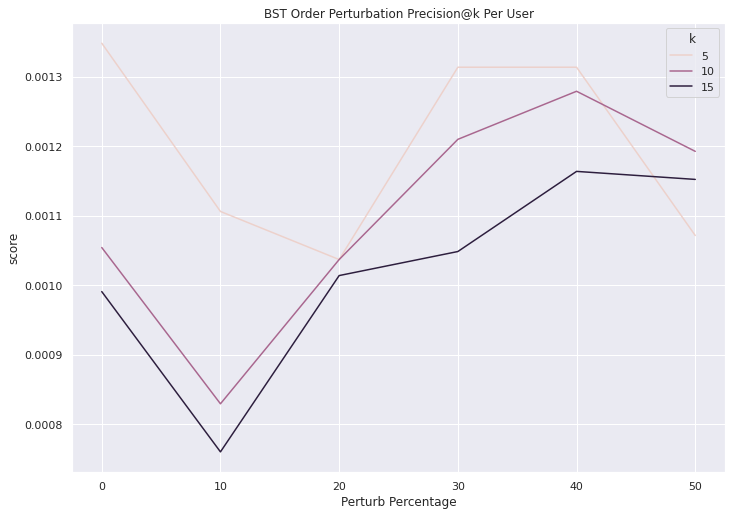

In [62]:
sns.lineplot(data=df_random_bst[df_random_bst['Metrics'] == 'Precision'], x='Perturb Percentage', y="score", hue="k").set(title='BST Order Perturbation Precision@k Per User')

[Text(0.5, 1.0, 'BST Order Perturbation Recall@k Per User')]

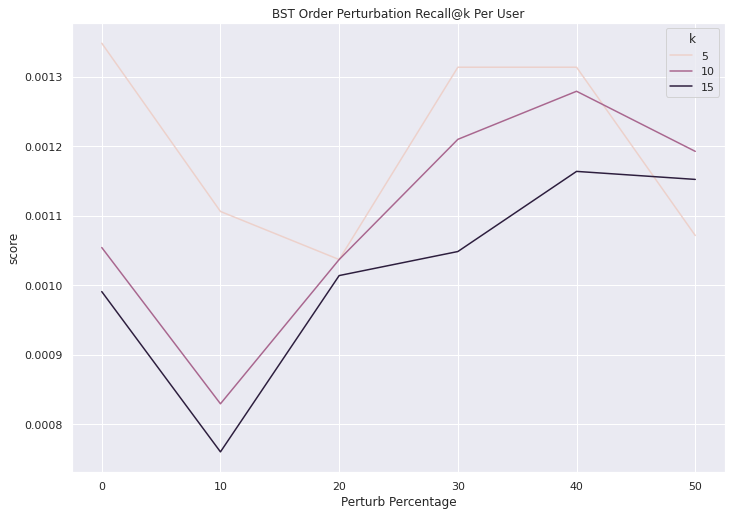

In [63]:
sns.lineplot(data=df_random_bst[df_random_bst['Metrics'] == 'Recall'], x='Perturb Percentage', y="score", hue="k").set(title='BST Order Perturbation Recall@k Per User')

[Text(0.5, 1.0, 'BST Order Perturbation NDCG@k Per User')]

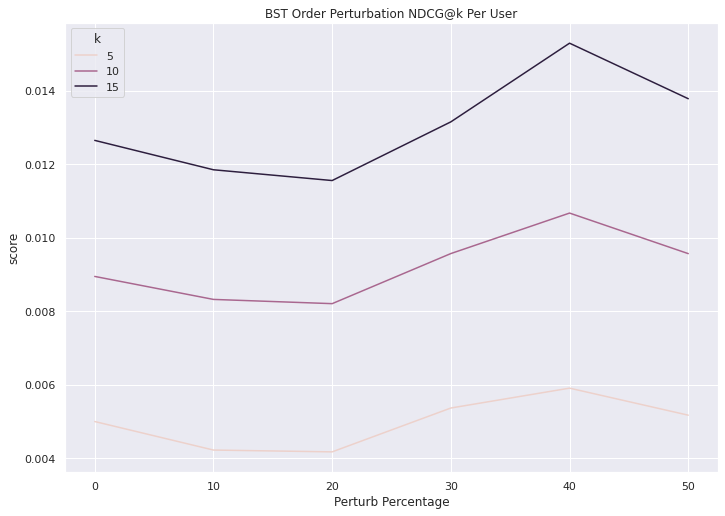

In [64]:
sns.lineplot(data=df_random_bst[df_random_bst['Metrics'] == 'NDCG'], x='Perturb Percentage', y="score", hue="k").set(title='BST Order Perturbation NDCG@k Per User')